In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
import utils
from BlackFrames import BlackFrames

In [10]:
def test_outliers(images):
    img0 = images[0]
    bf = BlackFrames(img0)
    bf.process(1)
    less = [bf.less_mask.sum()]
    more = [bf.more_mask.sum()]
    out = [(bf.less_mask + bf.more_mask).sum()]
    for i,image in enumerate(images[1:]):
        print "%.f \t%%" % (100.0 * i/len(images)) 
        bf.add(image)
        less.append(bf.less_mask.sum())
        more.append(bf.more_mask.sum())
        out.append((bf.less_mask + bf.more_mask).sum())
    return less, more, out

In [11]:
dir_ = './black_frames/DARKS/'
paths = [dir_ + f for f in os.listdir(dir_)]
img = utils.image(paths)

### Image  0
0 	 less: 0 	 more: 33 	 out: 0.0003 %


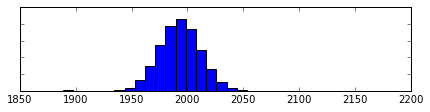

1 	 less: 0 	 more: 0 	 out: 0.0003 %


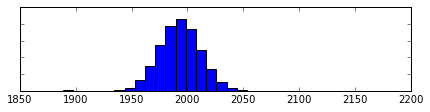

0 	%
25 	%
50 	%


In [16]:
less, more, out = test_outliers(img)

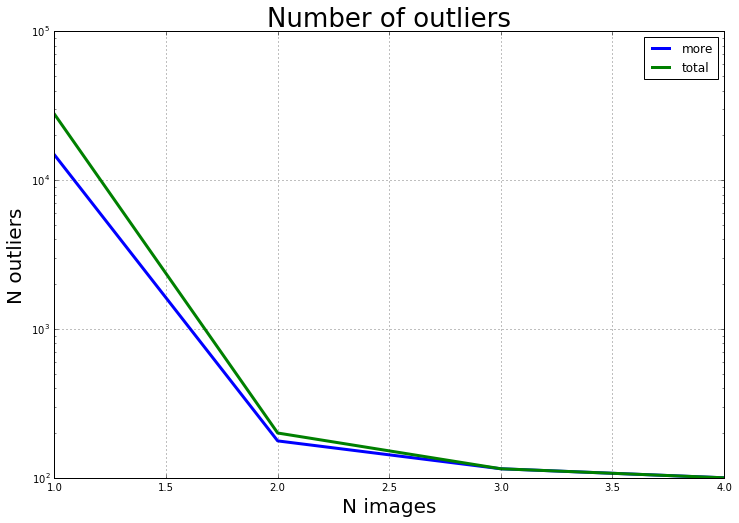

In [44]:
x = range(1,len(img)+1)
plt.figure(figsize=(12,8))
plt.title("Number of outliers", fontsize=26)
#plt.semilogy(x, less, lw=3, label='less' )
plt.semilogy(x, more, lw=3, label='more' )
plt.semilogy(x, out, lw=3, label='total' )
plt.legend(loc='best')
plt.xlabel('N images', fontsize=20)
plt.ylabel('N outliers', fontsize=20)
plt.grid()
plt.show()